In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add the dependency libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.lines as mlines
import os
import numpy as np

## Data Preprocessing
### Calculate MgO #

In [2]:
#import data
data = os.path.join("..","DATA", "new_data_csv.csv")
df = pd.read_csv(data)

In [3]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44


In [4]:
df['FeO'] = 0.899*df['Fe2O3']

In [5]:
df['MgO_Num'] = 100*((df['FeO']/40.3)/((df['FeO']/40.3)+(df['MgO']/71.85)))

In [6]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


In [7]:
#text[i], (x[i], y[i]
text = df['sample'].tolist()
x = df.MgO_Num.tolist()
y = df.Fo.tolist()
print(text, x ,y)

['EXI504L2 18-1 ', 'EXI504L2 15-3 ', 'EX1504L2-D7-1', 'EXI504L2 11-2 ', 'EX1504L2-D2-4'] [83.64789242358277, 67.09504263700164, 72.01175166491835, 57.08201312160389, 68.95604431578839] [81.18, 90.62, 87.02, 86.04, 89.44]


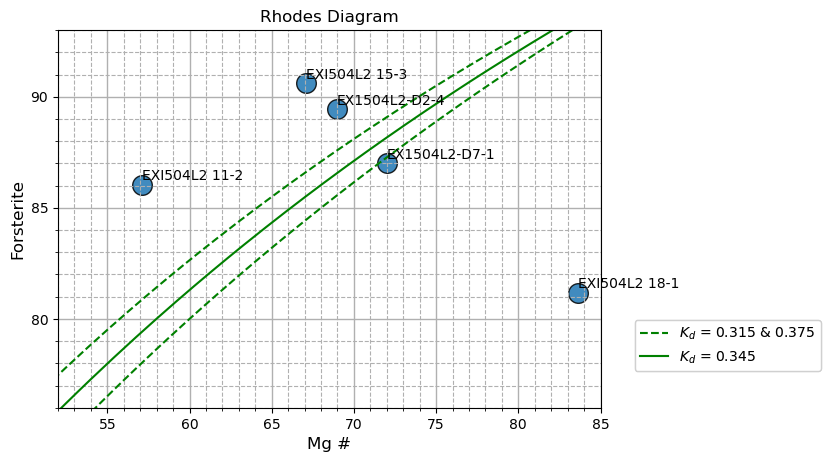

In [8]:
# Define the 3 Kd values
Kd1 = 0.315
Kd2 = 0.345
Kd3 = 0.375

Mg_Fe_Ol = np.arange(1,1000,0.1)
Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

# Calculate equilibrium lines
Fo_liq_1  = (Mg_Fe_Ol*Kd1)
Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

Fo_liq_2  = (Mg_Fe_Ol*Kd2)
Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

Fo_liq_3  = (Mg_Fe_Ol*Kd3)
Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

fig, ax = plt.subplots()

#Set axis labels
ax.set_ylabel("Forsterite", fontsize=12)
ax.set_xlabel("Mg #", fontsize=12)

#Kd = 0.315
kd1 = ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

#Kd = 0.345
kd2 = ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

#Kd = 0.375
kd3 = ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

#Plot data with colors representing the distance from Kilauea
data = ax.scatter(
    df.MgO_Num, 
    df.Fo, 
    s=200, 
    alpha=0.85, 
    edgecolors='k' 
    
)

#Adjust axis properties

ax.set_xlim(52, 85)
ax.set_ylim(76, 93)
ax.set_title('Rhodes Diagram')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

#Grid lines
ax.grid(True, which='major', linestyle='-', linewidth=1)
ax.grid(True, which='minor', linestyle = '--')

#Legend properties
# legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('lightgrey')

kd_1_3_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.315 & 0.375', linestyle='--')
kd_2_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.345', linestyle='-')

legend = ax.legend(handles=[kd_1_3_line, kd_2_line])
first_legend = ax.legend(
    handles=[kd_1_3_line, kd_2_line], 
    facecolor = 'white', 
    loc='upper left',  
    bbox_to_anchor=(1.05, 0.25) )

plt.gca().add_artist(first_legend)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))

#handles = [mlines.Line2D([0], [0], marker='o', color='w', 
                  #markerfacecolor=v, label=k, markersize=8, markeredgecolor='k') for k, v in color_dict.items()]

#ax.legend(title='Seamounts', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

In [9]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


#### So we need to use olivine addition on 3 samples (EX1504L2-15-3, D2-4 and 11-2), and olivine subtraction on the remaining samples (EX1504L2-D7-1, and 18-1)

In [10]:
# Get olivine data to be able to calculate the median olivine composition

ol_data = os.path.join("..", "DATA", "ol_data.csv")
ol_df = pd.read_csv(ol_data)

In [11]:
ol_df

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.225500,21.314700,39.615800,0.234812,0.177097,0.262172,99.861400,76.815000
1,D18-1-_001,4.0,38.241300,21.233100,39.669500,0.232845,0.187069,0.262046,99.828400,76.907300
2,D18-1-_001,4.0,38.341700,21.218300,39.649000,0.231325,0.178396,0.261592,99.880300,76.910500
3,NaN,NaN,38.269500,21.255367,39.644767,0.232994,0.180854,0.261937,99.856700,76.877600
4,D18-1-_002,5.0,38.140500,21.158300,39.420000,0.261276,0.162664,0.266945,99.423600,76.857900
...,...,...,...,...,...,...,...,...,...,...
221,NaN,NaN,40.345933,11.274700,47.327067,0.318909,0.316384,0.164569,99.754633,88.211233
222,D2-4_010,63.0,39.676700,14.402500,45.052600,0.303962,0.292398,0.199342,99.952200,84.793400
223,D2-4_010,63.0,39.789800,14.263700,44.938100,0.305096,0.294804,0.197279,99.802200,84.885300
224,D2-4_010,63.0,39.809500,14.262600,44.772500,0.301625,0.306307,0.196228,99.655600,84.838800


In [12]:
ol_df.isna().sum()

SAMPLE    55
NUMBER    60
SiO2       8
FeO        8
MgO        8
CaO        8
NiO        8
MnO        8
TOTAL      8
Fo         8
dtype: int64

In [13]:
ol_df2 = ol_df.dropna(axis=0, thresh=None, subset='SAMPLE', inplace=False)

In [14]:
ol_df2

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.2255,21.3147,39.6158,0.234812,0.177097,0.262172,99.8614,76.8150
1,D18-1-_001,4.0,38.2413,21.2331,39.6695,0.232845,0.187069,0.262046,99.8284,76.9073
2,D18-1-_001,4.0,38.3417,21.2183,39.6490,0.231325,0.178396,0.261592,99.8803,76.9105
4,D18-1-_002,5.0,38.1405,21.1583,39.4200,0.261276,0.162664,0.266945,99.4236,76.8579
5,D18-1-_002,5.0,37.9687,21.3426,39.4751,0.262853,0.159011,0.268533,99.4767,76.7282
...,...,...,...,...,...,...,...,...,...,...
219,D2-4_009,62.0,40.3568,11.3351,47.3802,0.319497,0.315664,0.164143,99.8915,88.1673
220,D2-4_009,62.0,40.4426,11.3049,47.2102,0.318462,0.319299,0.165473,99.7609,88.1576
222,D2-4_010,63.0,39.6767,14.4025,45.0526,0.303962,0.292398,0.199342,99.9522,84.7934
223,D2-4_010,63.0,39.7898,14.2637,44.9381,0.305096,0.294804,0.197279,99.8022,84.8853


In [15]:
ol_df2.isna().sum()

SAMPLE    0
NUMBER    5
SiO2      1
FeO       1
MgO       1
CaO       1
NiO       1
MnO       1
TOTAL     1
Fo        1
dtype: int64

In [16]:
ol_df2.SAMPLE.unique()

array(['D18-1-_001', 'D18-1-_002', 'D18-1-_003', 'D18-1-_004',
       'D18-1- ave', 'D18-1-_005', 'D18-1-_006', 'D18-1-_007',
       'D18-1-_008', 'D18-1-_009', 'D18-1-_010', 'D18-1-_011',
       'D15-3__001', 'D15-3__002', 'D15-3 ave', 'D15-3__003',
       'D15-3__004', 'D15-3__005', 'D15-3__006', 'D15-3__007',
       'D15-3__008', 'D15-3__009', 'D15-3__010', 'D15-3_011',
       'D15-3__012', 'D15-3__013', 'D15-3__014', 'D7-1__001',
       'D7-1___002', 'D7-1___003', 'D7-1___004', 'D7-1___005',
       'D7-1___006', 'D7-1___007', 'D7-1__008', 'D7-1__009', 'D7-1__010',
       'D7-1 ave', 'D11-2_001', 'D11-2_002', 'D11-2_003', 'D11-2_004',
       'D11-2_005', 'D11-2_006', 'D11-2 ave', 'D11-2_007', 'D11-2_008',
       'D11-2_009', 'D11-2_010', 'D2-4_001', 'D2-4_002', 'D2-4_003',
       'D2-4_004', 'D2-4_005', 'D2-4_006', 'D2-4 ave', 'D2-4_007',
       'D2-4_008', 'D2-4_009', 'D2-4_010'], dtype=object)

In [17]:
ol15_3 = ol_df2[ol_df2['SAMPLE'].str.contains("D15-3")]

### Aquick view of the measurement distributions for olivine compositions show non-normal distributions and the mean composition will not be an acurrate measurement for the olivine compositon used in fractionation modelling. The median will be used instead to approximate the central tendacy of the distiribution of olivines in the magma.

In [18]:
ol15_3.describe()

,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
count,45.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,24.000000,40.228606,10.226813,48.539722,0.251716,0.389430,0.141755,99.810215,89.425649
std,4.477215,0.215389,0.970516,0.799550,0.005668,0.019903,0.013486,0.405470,1.050315
min,17.000000,39.703400,9.090120,46.462000,0.239140,0.340162,0.117138,98.598000,86.670400
25%,20.000000,40.165550,9.534675,48.111325,0.248206,0.376494,0.133710,99.593650,88.881125
50%,24.000000,40.252050,10.082400,48.526000,0.251120,0.394417,0.138465,99.847950,89.493300
75%,28.000000,40.366100,10.767900,49.306000,0.254300,0.404757,0.147253,100.058500,90.222100
max,31.000000,40.673700,12.758100,49.517100,0.266939,0.422227,0.179884,100.742000,90.647200


In [19]:
ol15_3.head()

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
46,D15-3__001,17.0,39.7034,10.09110,47.9965,0.250750,0.360885,0.159272,98.5980,89.4498
47,D15-3__001,17.0,39.7904,10.21100,48.1083,0.249873,0.370828,0.140432,98.9095,89.3600
48,D15-3__001,17.0,39.8884,10.03450,48.1245,0.253612,0.379836,0.146131,98.8642,89.5278
50,D15-3__002,18.0,40.2278,9.09630,49.3686,0.248917,0.422227,0.121581,99.5012,90.6320
51,D15-3__002,18.0,40.2548,9.13721,49.2685,0.249514,0.415843,0.130838,99.4703,90.5765


In [20]:
ol15_3_med = ol15_3.median(axis=0)

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\231655227.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ol15_3_med = ol15_3.median(axis=0)


In [22]:
ol15_3_med

NUMBER    24.000000
SiO2      40.252050
FeO       10.082400
MgO       48.526000
CaO        0.251120
NiO        0.394417
MnO        0.138465
TOTAL     99.847950
Fo        89.493300
dtype: float64

In [23]:
df.columns

Index(['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL', 'SiO2_ol', 'FeO_ol', 'MgO_ol', 'CaO_ol',
       'NiO_ol', 'MnO_ol', 'TOTAL_ol', 'Fo', 'FeO', 'MgO_Num'],
      dtype='object')

In [24]:
df_WR = df[['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL']]

In [25]:
df_WR

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89


In [26]:
WR_15_3 = df_WR.iloc[1]

In [27]:
WR_15_3

sample    EXI504L2 15-3 
SiO2               48.71
TiO2                2.34
Al2O3               12.7
Fe2O3              12.62
MnO                 0.16
MgO                 9.92
CaO                10.79
Na2O                 2.2
K2O                 0.52
P2O5                0.26
TOTAL              100.2
Name: 1, dtype: object

In [29]:
WR_15_3['Fe2O3']

12.62

## Define the magma composition and adjust iron to FeO and Fe<sub>2</sub>O<sub>3</sub>

In [31]:
magma = WR_15_3
magma['FeO'] = WR_15_3['Fe2O3']*0.9
magma['Fe2O3'] = WR_15_3['Fe2O3']*0.1

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\576264084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = WR_15_3['Fe2O3']*0.9
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\576264084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = WR_15_3['Fe2O3']*0.9
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\576264084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['Fe2O3'] = WR_15_3['Fe2O3

In [32]:
magma

sample    EXI504L2 15-3 
SiO2               48.71
TiO2                2.34
Al2O3               12.7
Fe2O3              1.262
MnO                 0.16
MgO                 9.92
CaO                10.79
Na2O                 2.2
K2O                 0.52
P2O5                0.26
TOTAL              100.2
FeO               11.358
Name: 1, dtype: object

In [33]:
# Find the Mg# for a magma in equilibrium with the highest Fo olivine in the analysis
fo_max = max(ol15_3.Fo)
Fo_diff_array = Mg_Num_Ol - fo_max
min_diff = min(abs(Fo_diff_array))
print(f'Minumum difference is: {min_diff}')

Minumum difference is: 0.0070056074766426946


In [34]:
Fo_diff_array = abs(Fo_diff_array)

In [35]:
diff_list = Fo_diff_array.tolist()

In [36]:
diff_list

[40.6472,
 38.26624761904761,
 36.101745454545444,
 34.12546086956521,
 32.31386666666666,
 30.64719999999999,
 29.108738461538458,
 27.684237037037022,
 26.361485714285706,
 25.12995862068965,
 23.980533333333327,
 22.905264516129023,
 21.897199999999984,
 20.95023030303028,
 20.05896470588233,
 19.218628571428553,
 18.42497777777777,
 17.674227027027015,
 16.962989473684203,
 16.28822564102562,
 15.647199999999984,
 15.037443902438994,
 14.456723809523794,
 13.903013953488369,
 13.374472727272718,
 12.869422222222198,
 12.386330434782593,
 11.923795744680845,
 11.480533333333327,
 11.055363265306099,
 10.647199999999984,
 10.255043137254887,
 9.87796923076921,
 9.515124528301882,
 9.165718518518503,
 8.829018181818157,
 8.504342857142845,
 8.191059649122792,
 7.888579310344809,
 7.59635254237287,
 7.313866666666655,
 7.040642622950813,
 6.776232258064496,
 6.520215873015857,
 6.272199999999984,
 6.031815384615371,
 5.79871515151514,
 5.572573134328337,
 5.353082352941172,
 5.13995362

In [37]:
index = np.where(diff_list == min_diff)
index

(array([87], dtype=int64),)

In [38]:
Mg_NUM_liq_2[index]

array([76.99298286])

In [39]:
Mg_num_Target = Mg_NUM_liq_2[index][0]
Mg_num_Target

76.99298285977224

In [40]:
magma_Mg_num = 100*((magma['FeO']/40.3)/((magma['FeO']/40.3)+(magma['MgO']/71.85)))
magma_Mg_num

67.11958227025526

In [41]:
p_magmas = magma.to_frame().transpose()

p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO
1,EXI504L2 15-3,48.71,2.34,12.7,1.262,0.16,9.92,10.79,2.2,0.52,0.26,100.2,11.358


In [42]:
p_magmas['Run'] = 0
p_magmas['Mg#'] = magma_Mg_num
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
1,EXI504L2 15-3,48.71,2.34,12.7,1.262,0.16,9.92,10.79,2.2,0.52,0.26,100.2,11.358,0,67.119582


In [43]:
col = p_magmas.columns.to_list()
new_magma = dict.fromkeys(col, 0)

In [44]:
# Design the ol-subtraction fractionation model

#Find the Mg# for the magma in equilibrium with highest Fo and set it as the target for the while loop
# Mg_num_Target = Mg_NUM_liq_2[index]
# #While loop flag
# cut_off = 0.01
# flag = 0
# i = 0

# while flag == 0:
#     print(f'Running iteration:{i}')
#     old_magma = p_magmas.iloc[-1]
    
#     new_magma['SiO2'] = old_magma['SiO2'] - D18_1_med.SiO2*0.1
#     new_magma['TiO2'] = old_magma['TiO2']
#     new_magma['Al2O3'] = old_magma['Al2O3']
#     new_magma['FeO'] = old_magma['FeO'] - D18_1_med.FeO*0.1
#     new_magma['MnO'] = old_magma['MnO'] - D18_1_med.MnO*0.1
#     new_magma['MgO'] = old_magma['MgO'] - D18_1_med.MgO*0.1 
#     new_magma['CaO'] = old_magma['CaO'] - D18_1_med.CaO*0.1
#     new_magma['Na2O'] = old_magma['Na2O'] 
#     new_magma['K2O'] = old_magma['K2O']
#     new_magma['P2O5'] = old_magma['P2O5']
    
#     magma_Mg_num = 100*((new_magma['FeO']/40.3)/((new_magma['FeO']/40.3)+(new_magma['MgO']/71.85)))
    
#     mg_num_diff = magma_Mg_num - Mg_num_Target
    
#     i+=1
    
#     print(f'Magma Mg# is:{magma_Mg_num}')
    
#     if mg_num_diff > cut_off:
#         flag = flag
#     else:
#         flag = 1


In [45]:
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
1,EXI504L2 15-3,48.71,2.34,12.7,1.262,0.16,9.92,10.79,2.2,0.52,0.26,100.2,11.358,0,67.119582


In [47]:
i=0
for j in range(100):
    print(f'Running iteration:{i}')
    old_magma = p_magmas.iloc[-1]
    
    print(old_magma)
    
    new_magma['SiO2'] = old_magma['SiO2'] + ol15_3_med.SiO2*0.001
    new_magma['TiO2'] = old_magma['TiO2']
    new_magma['Al2O3'] = old_magma['Al2O3']
    new_magma['FeO'] = old_magma['FeO'] + ol15_3_med.FeO*0.001
    new_magma['MnO'] = old_magma['MnO'] + ol15_3_med.MnO*0.001
    new_magma['MgO'] = old_magma['MgO'] + ol15_3_med.MgO*0.001 
    new_magma['CaO'] = old_magma['CaO'] + ol15_3_med.CaO*0.001
    new_magma['Na2O'] = old_magma['Na2O'] 
    new_magma['K2O'] = old_magma['K2O']
    new_magma['P2O5'] = old_magma['P2O5']
    
    magma_Mg_num = 100*((new_magma['FeO']/40.3)/((new_magma['FeO']/40.3)+(new_magma['MgO']/71.85)))
    
    new_magma['Mg#'] = magma_Mg_num
    
    new_magma['Run'] = i+1
    
    mg_num_diff = magma_Mg_num - Mg_num_Target
    
    i+=1
    
    print(f'Magma Mg# is:{magma_Mg_num}')
    
    p_magmas = p_magmas.append(new_magma, ignore_index=True)
    


Running iteration:0
sample    EXI504L2 15-3 
SiO2               48.71
TiO2                2.34
Al2O3               12.7
Fe2O3              1.262
MnO                 0.16
MgO                 9.92
CaO                10.79
Na2O                 2.2
K2O                 0.52
P2O5                0.26
TOTAL              100.2
FeO               11.358
Run                    0
Mg#            67.119582
Name: 1, dtype: object
Magma Mg# is:67.03141061339902
Running iteration:1
sample          0.0
SiO2      48.750252
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.160138
MgO        9.968526
CaO       10.790251
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.368082
Run             1.0
Mg#       67.031411
Name: 1, dtype: object
Magma Mg# is:66.94362595299795
Running iteration:2
sample          0.0
SiO2      48.790504
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.160277
MgO       10.017052
CaO       10.7905

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      48.951512
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.160831
MgO       10.211156
CaO       10.791507
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.418494
Run             6.0
Mg#       66.596307
Name: 6, dtype: object
Magma Mg# is:66.51041939046549
Running iteration:7
sample          0.0
SiO2      48.991764
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.160969
MgO       10.259682
CaO       10.791758
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.428577
Run             7.0
Mg#       66.510419
Name: 7, dtype: object
Magma Mg# is:66.42490409007988
Running iteration:8
sample          0.0
SiO2      49.032016
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.161108
MgO       10.308208
CaO       10.792009
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       1

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      49.193025
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.161662
MgO       10.502312
CaO       10.793013
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.478989
Run            12.0
Mg#       66.086516
Name: 12, dtype: object
Magma Mg# is:66.00282494160226
Running iteration:13
sample          0.0
SiO2      49.233277
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO          0.1618
MgO       10.550838
CaO       10.793265
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.489071
Run            13.0
Mg#       66.002825
Name: 13, dtype: object
Magma Mg# is:65.91949212597642
Running iteration:14
sample          0.0
SiO2      49.273529
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.161939
MgO       10.599364
CaO       10.793516
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO    

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


Running iteration:21
sample          0.0
SiO2      49.555293
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.162908
MgO       10.939046
CaO       10.795274
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO        11.56973
Run            21.0
Mg#       65.345994
Name: 21, dtype: object
Magma Mg# is:65.26544326569169
Running iteration:22
sample          0.0
SiO2      49.595545
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.163046
MgO       10.987572
CaO       10.795525
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.579813
Run            22.0
Mg#       65.265443
Name: 22, dtype: object
Magma Mg# is:65.18523078880013
Running iteration:23
sample          0.0
SiO2      49.635797
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.163185
MgO       11.036098
CaO       10.795776
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL 

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:30
sample          0.0
SiO2      49.917561
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.164154
MgO        11.37578
CaO       10.797534
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.660472
Run            30.0
Mg#       64.633031
Name: 30, dtype: object
Magma Mg# is:64.55544687244712
Running iteration:31
sample          0.0
SiO2      49.957814
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.164292
MgO       11.424306
CaO       10.797785
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.670554
Run            31.0
Mg#       64.555447
Name: 31, dtype: object
Magma Mg# is:64.47818270164247
Running iteration:32
sample          0.0
SiO2      49.998066
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.164431
MgO       11.472832
CaO       10.798036
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      50.239578
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.165262
MgO       11.763988
CaO       10.799543
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.741131
Run            38.0
Mg#       64.021198
Name: 38, dtype: object
Magma Mg# is:63.9461158127554
Running iteration:39
sample          0.0
SiO2       50.27983
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO          0.1654
MgO       11.812514
CaO       10.799794
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.751214
Run            39.0
Mg#       63.946116
Name: 39, dtype: object
Magma Mg# is:63.871337999883835
Running iteration:40
sample          0.0
SiO2      50.320082
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.165539
MgO        11.86104
CaO       10.800045
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO    

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      50.561594
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.166369
MgO       12.152196
CaO       10.801552
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO        11.82179
Run            46.0
Mg#       63.428957
Name: 46, dtype: object
Magma Mg# is:63.3562571896058
Running iteration:47
sample          0.0
SiO2      50.601846
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.166508
MgO       12.200722
CaO       10.801803
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.831873
Run            47.0
Mg#       63.356257
Name: 47, dtype: object
Magma Mg# is:63.283847621229306
Running iteration:48
sample          0.0
SiO2      50.642098
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.166646
MgO       12.249248
CaO       10.802054
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO    

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      50.883611
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.167477
MgO       12.540404
CaO       10.803561
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO        11.90245
Run            54.0
Mg#       62.855381
Name: 54, dtype: object
Magma Mg# is:62.784952260080416
Running iteration:55
sample          0.0
SiO2      50.923863
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.167616
MgO        12.58893
CaO       10.803812
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       11.912532
Run            55.0
Mg#       62.784952
Name: 55, dtype: object
Magma Mg# is:62.71480018723852
Running iteration:56
sample          0.0
SiO2      50.964115
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.167754
MgO       12.637456
CaO       10.804063
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO   

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      51.366635
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.169139
MgO       13.122716
CaO       10.806574
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       12.023438
Run            66.0
Mg#       62.028129
Name: 66, dtype: object
Magma Mg# is:61.960912248270425
Running iteration:67
sample          0.0
SiO2      51.406887
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.169277
MgO       13.171242
CaO       10.806825
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       12.033521
Run            67.0
Mg#       61.960912
Name: 67, dtype: object
Magma Mg# is:61.89395349613574
Running iteration:68
sample          0.0
SiO2      51.447139
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.169416
MgO       13.219768
CaO       10.807076
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO   

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm


sample          0.0
SiO2      51.688652
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.170246
MgO       13.510924
CaO       10.808583
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       12.104098
Run            74.0
Mg#       61.497531
Name: 74, dtype: object
Magma Mg# is:61.43233489468541
Running iteration:75
sample          0.0
SiO2      51.728904
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.170385
MgO        13.55945
CaO       10.808834
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO        12.11418
Run            75.0
Mg#       61.432335
Name: 75, dtype: object
Magma Mg# is:61.36738540124597
Running iteration:76
sample          0.0
SiO2      51.769156
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.170523
MgO       13.607976
CaO       10.809085
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO    

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

Running iteration:85
sample          0.0
SiO2      52.131424
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO         0.17177
MgO        14.04471
CaO       10.811345
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       12.215004
Run            85.0
Mg#       60.793692
Name: 85, dtype: object
Magma Mg# is:60.73112896893581
Running iteration:86
sample          0.0
SiO2      52.171676
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.171908
MgO       14.093236
CaO       10.811596
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL           0.0
FeO       12.225086
Run            86.0
Mg#       60.731129
Name: 86, dtype: object
Magma Mg# is:60.66879779356542
Running iteration:87
sample          0.0
SiO2      52.211928
TiO2           2.34
Al2O3          12.7
Fe2O3           0.0
MnO        0.172046
MgO       14.141762
CaO       10.811847
Na2O            2.2
K2O            0.52
P2O5           0.26
TOTAL  

C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magmas.append(new_magma, ignore_index=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_23636\3185266837.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_magmas = p_magm

In [48]:
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#
0,EXI504L2 15-3,48.71,2.34,12.7,1.262,0.16,9.92,10.79,2.2,0.52,0.26,100.2,11.358,0.0,67.119582
1,0.0,48.750252,2.34,12.7,0.0,0.160138,9.968526,10.790251,2.2,0.52,0.26,0.0,11.368082,1.0,67.031411
2,0.0,48.790504,2.34,12.7,0.0,0.160277,10.017052,10.790502,2.2,0.52,0.26,0.0,11.378165,2.0,66.943626
3,0.0,48.830756,2.34,12.7,0.0,0.160415,10.065578,10.790753,2.2,0.52,0.26,0.0,11.388247,3.0,66.856226
4,0.0,48.871008,2.34,12.7,0.0,0.160554,10.114104,10.791004,2.2,0.52,0.26,0.0,11.39833,4.0,66.769207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,52.574197,2.34,12.7,0.0,0.173293,14.578496,10.814108,2.2,0.52,0.26,0.0,12.32591,96.0,60.118023
97,0.0,52.614449,2.34,12.7,0.0,0.173431,14.627022,10.814359,2.2,0.52,0.26,0.0,12.335993,97.0,60.057937
98,0.0,52.654701,2.34,12.7,0.0,0.17357,14.675548,10.81461,2.2,0.52,0.26,0.0,12.346075,98.0,59.998069
99,0.0,52.694953,2.34,12.7,0.0,0.173708,14.724074,10.814861,2.2,0.52,0.26,0.0,12.356158,99.0,59.938418


In [49]:
new_magma

{'sample': 0,
 'SiO2': 52.735204999999944,
 'TiO2': 2.34,
 'Al2O3': 12.7,
 'Fe2O3': 0,
 'MnO': 0.17384650000000043,
 'MgO': 14.772600000000073,
 'CaO': 10.815112049999975,
 'Na2O': 2.2,
 'K2O': 0.52,
 'P2O5': 0.26,
 'TOTAL': 0,
 'FeO': 12.366239999999992,
 'Run': 100,
 'Mg#': 59.87898168615835}

<AxesSubplot:xlabel='Run'>

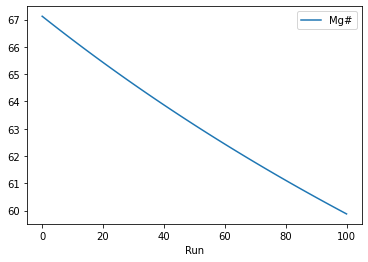

In [50]:
p_magmas.plot(x='Run', y='Mg#', kind='line')

<AxesSubplot:xlabel='Run'>

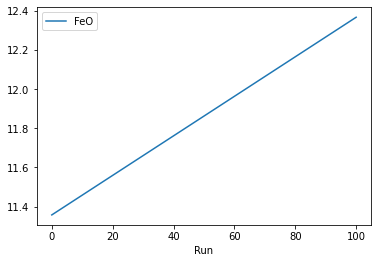

In [51]:
p_magmas.plot(x='Run', y='FeO', kind='line')

<AxesSubplot:xlabel='Run'>

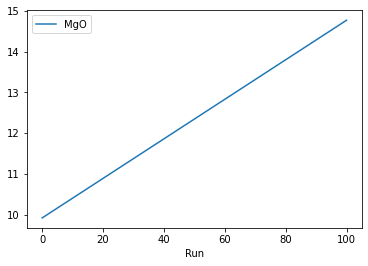

In [52]:
p_magmas.plot(x='Run', y='MgO', kind='line')

In [53]:
p_magmas['NewMg#'] = 100*((p_magmas['FeO']/40.3)/((p_magmas['FeO']/40.3)+(p_magmas['MgO']/71.85)))

In [54]:
p_magmas

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,FeO,Run,Mg#,NewMg#
0,EXI504L2 15-3,48.71,2.34,12.7,1.262,0.16,9.92,10.79,2.2,0.52,0.26,100.2,11.358,0.0,67.119582,67.119582
1,0.0,48.750252,2.34,12.7,0.0,0.160138,9.968526,10.790251,2.2,0.52,0.26,0.0,11.368082,1.0,67.031411,67.031411
2,0.0,48.790504,2.34,12.7,0.0,0.160277,10.017052,10.790502,2.2,0.52,0.26,0.0,11.378165,2.0,66.943626,66.943626
3,0.0,48.830756,2.34,12.7,0.0,0.160415,10.065578,10.790753,2.2,0.52,0.26,0.0,11.388247,3.0,66.856226,66.856226
4,0.0,48.871008,2.34,12.7,0.0,0.160554,10.114104,10.791004,2.2,0.52,0.26,0.0,11.39833,4.0,66.769207,66.769207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,52.574197,2.34,12.7,0.0,0.173293,14.578496,10.814108,2.2,0.52,0.26,0.0,12.32591,96.0,60.118023,60.118023
97,0.0,52.614449,2.34,12.7,0.0,0.173431,14.627022,10.814359,2.2,0.52,0.26,0.0,12.335993,97.0,60.057937,60.057937
98,0.0,52.654701,2.34,12.7,0.0,0.17357,14.675548,10.81461,2.2,0.52,0.26,0.0,12.346075,98.0,59.998069,59.998069
99,0.0,52.694953,2.34,12.7,0.0,0.173708,14.724074,10.814861,2.2,0.52,0.26,0.0,12.356158,99.0,59.938418,59.938418
